In [1]:
# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#Read and load datasets
DATASET_ENCODING = "ISO-8859-1"

# Load news from CSV file
tweets10 = Path("elonmusk_tweet_history/2010_tweets.csv")
tweets11 = Path("elonmusk_tweet_history/2011_tweets.csv")
tweets12 = Path("elonmusk_tweet_history/2012_tweets.csv")
tweets13 = Path("elonmusk_tweet_history/2013_tweets.csv")
tweets14 = Path("elonmusk_tweet_history/2014_tweets.csv")
tweets15 = Path("elonmusk_tweet_history/2015_tweets.csv")
tweets16 = Path("elonmusk_tweet_history/2016_tweets.csv")
tweets17 = Path("elonmusk_tweet_history/2017_tweets.csv")
tweets18 = Path("elonmusk_tweet_history/2018_tweets.csv")
tweets19 = Path("elonmusk_tweet_history/2019_tweets.csv")
tweets20 = Path("elonmusk_tweet_history/2020_tweets.csv")
tweets21 = Path("elonmusk_tweet_history/2021_tweets.csv")
tweets22 = Path("elonmusk_tweet_history/2022_tweets.csv")

# Create Dataframe
tweets2010 = pd.read_csv(tweets10, encoding="utf-8-sig")
tweets2011 = pd.read_csv(tweets11, encoding="utf-8-sig")
tweets2012 = pd.read_csv(tweets12, encoding="utf-8-sig")
tweets2013 = pd.read_csv(tweets13, encoding="utf-8-sig")
tweets2014 = pd.read_csv(tweets14, encoding="utf-8-sig")
tweets2015 = pd.read_csv(tweets15, encoding="utf-8-sig")
tweets2016 = pd.read_csv(tweets16, encoding="utf-8-sig")
tweets2017 = pd.read_csv(tweets17, encoding="utf-8-sig")
tweets2018 = pd.read_csv(tweets18, encoding="utf-8-sig")
tweets2019 = pd.read_csv(tweets19, encoding="utf-8-sig")
tweets2020 = pd.read_csv(tweets20, encoding="utf-8-sig")
tweets2021 = pd.read_csv(tweets21, encoding="utf-8-sig")
tweets2022 = pd.read_csv(tweets22, encoding="utf-8-sig")

In [9]:
tweets2018.head(5)

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1079469237230493696,1079155749077475328,1.546200e+12,2018-12-30 20:08:16,0,NaN,@Ben757677 @vincent13031925 Thanks Tesla owner...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1,1079459047252709377,1079457030060924928,1.546198e+12,2018-12-30 19:27:46,0,NaN,"@Grimezsz Turns out if you take Dayquil, you e...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Grimezsz', 'name': '☾laire d...",NaN,NaN,NaN,NaN
2,2,1078716366591483904,1078716366591483904,1.546021e+12,2018-12-28 18:16:38,0,NaN,Excited to have Larry Ellison &amp; Kathleen W...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1078529476018008064,1078529330492321793,1.545976e+12,2018-12-28 05:53:59,0,NaN,@NutmegTheRed @Tesla Ok,und,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Tesla', 'name': 'Tesla', 'id...",NaN,NaN,NaN,NaN
4,4,1078395092090699776,1078383289356902401,1.545944e+12,2018-12-27 21:00:00,0,NaN,@westcoastbill Tesla team did a great job!,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'westcoastbill', 'name': 'bil...",NaN,NaN,NaN,NaN


In [10]:
# Select Relevant Columns for the Dataframe
tweets2015df = tweets2015[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2016df = tweets2016[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2017df = tweets2017[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2018df = tweets2018[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2019df = tweets2019[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2020df = tweets2020[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2021df = tweets2021[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2022df = tweets2022[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()

In [11]:
tweets2019df.head(500)

,id,conversation_id,created_at,date,user_id,username,name,tweet
0,1211071324518531072,1210918835861241856,1.577577e+12,2019-12-28 23:47:59,44196397,elonmusk,Elon Musk,@Joe__Wakefield @austinbarnard45 @tjq1190 @tyg...
1,1211069054779301894,1210918835861241856,1.577576e+12,2019-12-28 23:38:57,44196397,elonmusk,Elon Musk,@austinbarnard45 @tjq1190 @tyger_cyber @fawful...
2,1211064937004589056,1210918835861241856,1.577575e+12,2019-12-28 23:22:36,44196397,elonmusk,Elon Musk,@IrinaAntony @tjq1190 @tyger_cyber @fawfulfan ...
3,1211054942192119808,1210918835861241856,1.577573e+12,2019-12-28 22:42:53,44196397,elonmusk,Elon Musk,@tjq1190 @tyger_cyber @fawfulfan @_Mikemo He d...
4,1211051740562366464,1210774027054145536,1.577572e+12,2019-12-28 22:30:09,44196397,elonmusk,Elon Musk,@geofficient Pretty much
...,...,...,...,...,...,...,...,...
495,1182005812975128576,1181925399514759173,1.570647e+12,2019-10-09 18:52:01,44196397,elonmusk,Elon Musk,@Teslarati We’re changing Powerwall Storm Watc...
496,1181991353212817408,1181988180326633472,1.570644e+12,2019-10-09 17:54:33,44196397,elonmusk,Elon Musk,@Kristennetten @annerajb @tesla_truth 🚀🚘 🧠🕳
497,1181990505363599360,1181988180326633472,1.570643e+12,2019-10-09 17:51:11,44196397,elonmusk,Elon Musk,@annerajb @tesla_truth Yes
498,1181990398379483137,1181988180326633472,1.570643e+12,2019-10-09 17:50:45,44196397,elonmusk,Elon Musk,@tesla_truth No change


In [13]:
doge_tweets2017df = tweets2017df.loc[tweets2017df['tweet'].str.contains("doge", case=False)]
display(doge_tweets2017df)
doge_tweets2018df = tweets2018df.loc[tweets2018df['tweet'].str.contains("doge", case=False)]
display(doge_tweets2018df)
doge_tweets2019df = tweets2019df.loc[tweets2019df['tweet'].str.contains("doge", case=False)]
display(doge_tweets2019df)
doge_tweets2020df = tweets2020df.loc[tweets2020df['tweet'].str.contains("doge", case=False)]
display(doge_tweets2020df)
doge_tweets2021df = tweets2021df.loc[tweets2021df['tweet'].str.contains("doge", case=False)]
display(doge_tweets2021df)
doge_tweets2022df = tweets2022df.loc[tweets2022df['tweet'].str.contains("doge", case=False)]
display(doge_tweets2022df)

,id,conversation_id,created_at,date,user_id,username,name,tweet


,id,conversation_id,created_at,date,user_id,username,name,tweet


,id,conversation_id,created_at,date,user_id,username,name,tweet
2192,1113178951403180032,1113178951403180032,1.554238e+12,2019-04-02 20:38:38,44196397,elonmusk,Elon Musk,Dogecoin value may vary https://t.co/UWerAhPv63
2193,1113173498384441344,1113173498384441344,1.554236e+12,2019-04-02 20:16:58,44196397,elonmusk,Elon Musk,Dogecoin rulz https://t.co/flWWUgAgLU
2194,1113164389929160706,1113145654363119616,1.554234e+12,2019-04-02 19:40:46,44196397,elonmusk,Elon Musk,@dogecoin Uh oh
2195,1113009339743100929,1113008901497278465,1.554197e+12,2019-04-02 09:24:39,44196397,elonmusk,Elon Musk,@Tom_Heats Dogecoin might be my fav cryptocurr...


,id,conversation_id,created_at,date,user_id,username,name,tweet
64,1340590280848908288,1340590280848908288,1.608457e+12,2020-12-20 09:30:04,44196397,elonmusk,Elon Musk,One word: Doge
261,1328771222822400001,1328737460617158662,1.605639e+12,2020-11-17 18:45:21,44196397,elonmusk,Elon Musk,@ReflexFunds @nickidk4 @pcgamer Dojo/Doge
1427,1284290215561986048,1284289867304722432,1.595034e+12,2020-07-18 00:53:43,44196397,elonmusk,Elon Musk,"@izzynobre Excuse me, I only sell Doge!"
2355,1254039929333649409,1254014899950366720,1.587821e+12,2020-04-25 13:29:52,44196397,elonmusk,Elon Musk,@28delayslater @justpaulinelol Dogecoin Mode
5597,1113178951403180032,1113178951403180032,1.554238e+12,2019-04-02 20:38:38,44196397,elonmusk,Elon Musk,Dogecoin value may vary https://t.co/UWerAhPv63
5598,1113173498384441344,1113173498384441344,1.554236e+12,2019-04-02 20:16:58,44196397,elonmusk,Elon Musk,Dogecoin rulz https://t.co/flWWUgAgLU
5599,1113164389929160706,1113145654363119616,1.554234e+12,2019-04-02 19:40:46,44196397,elonmusk,Elon Musk,@dogecoin Uh oh
5600,1113009339743100929,1113008901497278465,1.554197e+12,2019-04-02 09:24:39,44196397,elonmusk,Elon Musk,@Tom_Heats Dogecoin might be my fav cryptocurr...


,id,conversation_id,created_at,date,user_id,username,name,tweet
50,1473914193527070770,1473867065039675394,2021-12-23 11:11:42 Arabian Standard Time,2021-12-23,44196397,elonmusk,Elon Musk,@BillyM2k @jack @gladstein @rahilla @farokh @s...
176,1470703708677840896,1470703708677840896,2021-12-14 14:34:23 Arabian Standard Time,2021-12-14,44196397,elonmusk,Elon Musk,Tesla will make some merch buyable with Doge &...
186,1470465831775739908,1470424785800728582,2021-12-13 22:49:08 Arabian Standard Time,2021-12-13,44196397,elonmusk,Elon Musk,@DOGEHOUNDS @HardcoreHistory Overall kill rati...
223,1469384135198363651,1469353138893250570,2021-12-10 23:10:52 Arabian Standard Time,2021-12-10,44196397,elonmusk,Elon Musk,@GailAlfarATX @SawyerMerritt @dogecoin Imbued ...
377,1464000520616558592,1463747533444894722,2021-11-26 02:38:18 Arabian Standard Time,2021-11-26,44196397,elonmusk,Elon Musk,@GailAlfarATX @SpaceX @RGVaerialphotos @cnunez...
...,...,...,...,...,...,...,...,...
2842,1358240143459577859,1358115248885137418,2021-02-07 06:24:19 Arabian Standard Time,2021-02-07,44196397,elonmusk,Elon Musk,@Dogecoinrich 🤣🤣
2851,1357972904663687173,1357834619924586497,2021-02-06 12:42:25 Arabian Standard Time,2021-02-06,44196397,elonmusk,Elon Musk,@Grimezsz Dogecake
2879,1357244295091208193,1357244295091208193,2021-02-04 12:27:10 Arabian Standard Time,2021-02-04,44196397,elonmusk,Elon Musk,"No highs, no lows, only Doge"
2881,1357241340313141249,1357241340313141249,2021-02-04 12:15:26 Arabian Standard Time,2021-02-04,44196397,elonmusk,Elon Musk,Dogecoin is the people’s crypto


,id,conversation_id,created_at,date,user_id,username,name,tweet
42,1498870920383025161,1498848735798960130,2022-03-02 08:00:49 Arabian Standard Time,2022-03-02,44196397,elonmusk,Elon Musk,@dogesuppporteam @CarlosS74671189 @JoeBiden .@...
124,1495824937269055495,1495489169182896130,2022-02-21 22:17:10 Arabian Standard Time,2022-02-21,44196397,elonmusk,Elon Musk,@martiandoge @SteveofRivia @almeneses1 @Sawyer...
368,1486768360025174020,1486494532007079937,2022-01-27 22:29:34 Arabian Standard Time,2022-01-27,44196397,elonmusk,Elon Musk,@dogeofficialceo @EvaFoxU @POTUS 🤣
385,1485953263040188416,1485953263040188416,2022-01-25 16:30:40 Arabian Standard Time,2022-01-25,44196397,elonmusk,Elon Musk,I will eat a happy meal on tv if @McDonalds ac...
406,1483907599036780557,1483735902564270081,2022-01-20 01:01:55 Arabian Standard Time,2022-01-20,44196397,elonmusk,Elon Musk,@blueskykites @Grimezsz @WholeMarsBlog @SpaceX...
468,1481873421390680065,1481873421390680065,2022-01-14 10:18:50 Arabian Standard Time,2022-01-14,44196397,elonmusk,Elon Musk,Tesla merch buyable with Dogecoin
556,1498870920383025161,1498848735798960130,2022-03-02 08:00:49 Arabian Standard Time,2022-03-02,44196397,elonmusk,Elon Musk,@dogesuppporteam @CarlosS74671189 @JoeBiden .@...
638,1495824937269055495,1495489169182896130,2022-02-21 22:17:10 Arabian Standard Time,2022-02-21,44196397,elonmusk,Elon Musk,@martiandoge @SteveofRivia @almeneses1 @Sawyer...
882,1486768360025174020,1486494532007079937,2022-01-27 22:29:34 Arabian Standard Time,2022-01-27,44196397,elonmusk,Elon Musk,@dogeofficialceo @EvaFoxU @POTUS 🤣
899,1485953263040188416,1485953263040188416,2022-01-25 16:30:40 Arabian Standard Time,2022-01-25,44196397,elonmusk,Elon Musk,I will eat a happy meal on tv if @McDonalds ac...


In [22]:
combined_doge_df = [doge_tweets2022df,doge_tweets2021df,doge_tweets2020df,doge_tweets2019df,doge_tweets2018df,doge_tweets2017df]
elon_combined_tweets_doge = pd.concat(combined_doge_df).reset_index()
elon_combined_tweets_doge

,index,id,conversation_id,created_at,date,user_id,username,name,tweet
0,42,1498870920383025161,1498848735798960130,2022-03-02 08:00:49 Arabian Standard Time,2022-03-02,44196397,elonmusk,Elon Musk,@dogesuppporteam @CarlosS74671189 @JoeBiden .@...
1,124,1495824937269055495,1495489169182896130,2022-02-21 22:17:10 Arabian Standard Time,2022-02-21,44196397,elonmusk,Elon Musk,@martiandoge @SteveofRivia @almeneses1 @Sawyer...
2,368,1486768360025174020,1486494532007079937,2022-01-27 22:29:34 Arabian Standard Time,2022-01-27,44196397,elonmusk,Elon Musk,@dogeofficialceo @EvaFoxU @POTUS 🤣
3,385,1485953263040188416,1485953263040188416,2022-01-25 16:30:40 Arabian Standard Time,2022-01-25,44196397,elonmusk,Elon Musk,I will eat a happy meal on tv if @McDonalds ac...
4,406,1483907599036780557,1483735902564270081,2022-01-20 01:01:55 Arabian Standard Time,2022-01-20,44196397,elonmusk,Elon Musk,@blueskykites @Grimezsz @WholeMarsBlog @SpaceX...
...,...,...,...,...,...,...,...,...,...
123,5600,1113009339743100929,1113008901497278465,1554197079000.0,2019-04-02 09:24:39,44196397,elonmusk,Elon Musk,@Tom_Heats Dogecoin might be my fav cryptocurr...
124,2192,1113178951403180032,1113178951403180032,1554237518000.0,2019-04-02 20:38:38,44196397,elonmusk,Elon Musk,Dogecoin value may vary https://t.co/UWerAhPv63
125,2193,1113173498384441344,1113173498384441344,1554236218000.0,2019-04-02 20:16:58,44196397,elonmusk,Elon Musk,Dogecoin rulz https://t.co/flWWUgAgLU
126,2194,1113164389929160706,1113145654363119616,1554234046000.0,2019-04-02 19:40:46,44196397,elonmusk,Elon Musk,@dogecoin Uh oh


In [23]:
# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
elon_combined_tweets_doge['tweet'] = elon_combined_tweets['tweet'].apply(lambda text: cleaning_stopwords(text))
elon_combined_tweets_doge['tweet'].head(20)

0      dogesuppporteam CarlosS746189 JoeBiden McDonalds
1     martiandoge SteveofRivia almenese1 SawyerMerri...
2                       dogeofficialceo EvaFoxU POTUS 🤣
3        I eat happy meal tv McDonalds accepts Dogecoin
4     blueskykites Grimezsz WholeMarsBlog SpaceXMR m...
5                          Tesla merch buyable Dogecoin
6      dogesuppporteam CarlosS746189 JoeBiden McDonalds
7     martiandoge SteveofRivia almenese1 SawyerMerri...
8                       dogeofficialceo EvaFoxU POTUS 🤣
9        I eat happy meal tv McDonalds accepts Dogecoin
10    blueskykites Grimezsz WholeMarsBlog SpaceXMR m...
11                         Tesla merch buyable Dogecoin
12    BillyM2k jack gladstein rahilla farokh samkaze...
13           Tesla make merch buyable Doge amp see goes
14    DOGEHOUNDS HardcoreHistory Overall kill ratio ...
15    GailAlfarATX SawyerMerritt dogecoin Imbued gol...
16    GailAlfarATX SpaceX RGVaerialphotos cnunezimag...
17    BillyM2k WSBChairman joannabanananaa dogeo

In [24]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
elon_combined_tweets_doge['tweet']= elon_combined_tweets_doge['tweet'].apply(lambda x: cleaning_punctuations(x))
elon_combined_tweets_doge['tweet'].tail()

123    TomHeats Dogecoin might fav cryptocurrency It’...
124           Dogecoin value may vary httpstcoUWerAhPv63
125                     Dogecoin rulz httpstcoflWWUgAgLU
126                                       dogecoin Uh oh
127    TomHeats Dogecoin might fav cryptocurrency It’...
Name: tweet, dtype: object

In [25]:
# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
elon_combined_tweets_doge['tweet'] = elon_combined_tweets_doge['tweet'].apply(lambda x: cleaning_repeating_char(x))
elon_combined_tweets_doge['tweet'].tail()

123    TomHeats Dogecoin might fav cryptocurrency It’...
124           Dogecoin value may vary httpstcoUWerAhPv63
125                     Dogecoin rulz httpstcoflWWUgAgLU
126                                       dogecoin Uh oh
127    TomHeats Dogecoin might fav cryptocurrency It’...
Name: tweet, dtype: object

In [26]:
# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
elon_combined_tweets_doge['tweet'] = elon_combined_tweets_doge['tweet'].apply(lambda x: cleaning_URLs(x))
elon_combined_tweets_doge['tweet'].tail()

123    TomHeats Dogecoin might fav cryptocurrency It’...
124           Dogecoin value may vary httpstcoUWerAhPv63
125                     Dogecoin rulz httpstcoflWWUgAgLU
126                                       dogecoin Uh oh
127    TomHeats Dogecoin might fav cryptocurrency It’...
Name: tweet, dtype: object

In [27]:
# Cleaning and removing Numberic Numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
elon_combined_tweets_doge['tweet'] = elon_combined_tweets_doge['tweet'].apply(lambda x: cleaning_numbers(x))
elon_combined_tweets_doge['tweet'].tail()

123    TomHeats Dogecoin might fav cryptocurrency It’...
124             Dogecoin value may vary httpstcoUWerAhPv
125                     Dogecoin rulz httpstcoflWWUgAgLU
126                                       dogecoin Uh oh
127    TomHeats Dogecoin might fav cryptocurrency It’...
Name: tweet, dtype: object

In [28]:
# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

elon_combined_tweets_doge = elon_combined_tweets_doge.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
elon_combined_tweets_doge

,index,id,conversation_id,created_at,date,user_id,username,name,tweet
0,42,1498870920383025161,1498848735798960130,2022-03-02 08:00:49 Arabian Standard Time,2022-03-02,44196397,elonmusk,Elon Musk,dogesuppporteam CarlosS JoeBiden McDonalds
1,124,1495824937269055495,1495489169182896130,2022-02-21 22:17:10 Arabian Standard Time,2022-02-21,44196397,elonmusk,Elon Musk,martiandoge SteveofRivia almenes SawyerMerritt...
2,368,1486768360025174020,1486494532007079937,2022-01-27 22:29:34 Arabian Standard Time,2022-01-27,44196397,elonmusk,Elon Musk,dogeofficialceo EvaFoxU POTUS
3,385,1485953263040188416,1485953263040188416,2022-01-25 16:30:40 Arabian Standard Time,2022-01-25,44196397,elonmusk,Elon Musk,I eat happy meal tv McDonalds accepts Dogecoin
4,406,1483907599036780557,1483735902564270081,2022-01-20 01:01:55 Arabian Standard Time,2022-01-20,44196397,elonmusk,Elon Musk,blueskykites Grimezsz WholeMarsBlog SpaceXMR m...
...,...,...,...,...,...,...,...,...,...
123,5600,1113009339743100929,1113008901497278465,1554197079000.0,2019-04-02 09:24:39,44196397,elonmusk,Elon Musk,TomHeats Dogecoin might fav cryptocurrency Its...
124,2192,1113178951403180032,1113178951403180032,1554237518000.0,2019-04-02 20:38:38,44196397,elonmusk,Elon Musk,Dogecoin value may vary httpstcoUWerAhPv
125,2193,1113173498384441344,1113173498384441344,1554236218000.0,2019-04-02 20:16:58,44196397,elonmusk,Elon Musk,Dogecoin rulz httpstcoflWWUgAgLU
126,2194,1113164389929160706,1113145654363119616,1554234046000.0,2019-04-02 19:40:46,44196397,elonmusk,Elon Musk,dogecoin Uh oh


In [29]:
#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [30]:
# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in elon_combined_tweets_doge.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["tweet"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
elon_combined_tweets_doge = elon_combined_tweets_doge.join(text_sentiment_df)

In [31]:
elon_combined_tweets

,index,id,conversation_id,created_at,date,user_id,username,name,tweet
0,42,1498870920383025161,1498848735798960130,2022-03-02 08:00:49 Arabian Standard Time,2022-03-02,44196397,elonmusk,Elon Musk,dogesuppporteam CarlosS746189 JoeBiden McDonalds
1,124,1495824937269055495,1495489169182896130,2022-02-21 22:17:10 Arabian Standard Time,2022-02-21,44196397,elonmusk,Elon Musk,martiandoge SteveofRivia almenese1 SawyerMerri...
2,368,1486768360025174020,1486494532007079937,2022-01-27 22:29:34 Arabian Standard Time,2022-01-27,44196397,elonmusk,Elon Musk,dogeofficialceo EvaFoxU POTUS 🤣
3,385,1485953263040188416,1485953263040188416,2022-01-25 16:30:40 Arabian Standard Time,2022-01-25,44196397,elonmusk,Elon Musk,I will eat a happy meal on tv if McDonalds acc...
4,406,1483907599036780557,1483735902564270081,2022-01-20 01:01:55 Arabian Standard Time,2022-01-20,44196397,elonmusk,Elon Musk,blueskykites Grimezsz WholeMarsBlog SpaceXMR m...
...,...,...,...,...,...,...,...,...,...
123,5600,1113009339743100929,1113008901497278465,1554197079000.0,2019-04-02 09:24:39,44196397,elonmusk,Elon Musk,TomHeats Dogecoin might be my fav cryptocurren...
124,2192,1113178951403180032,1113178951403180032,1554237518000.0,2019-04-02 20:38:38,44196397,elonmusk,Elon Musk,Dogecoin value may vary httpstcoUWerAhPv63
125,2193,1113173498384441344,1113173498384441344,1554236218000.0,2019-04-02 20:16:58,44196397,elonmusk,Elon Musk,Dogecoin rulz httpstcoflWWUgAgLU
126,2194,1113164389929160706,1113145654363119616,1554234046000.0,2019-04-02 19:40:46,44196397,elonmusk,Elon Musk,dogecoin Uh oh


<AxesSubplot:title={'center':'Elon Musk Twitter DOGE Sentiment'}, xlabel='date'>

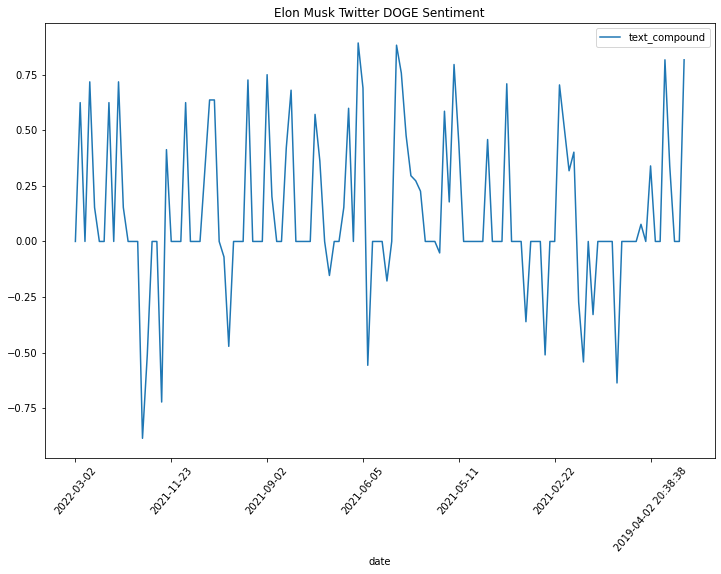

In [38]:
# Create Plot to Visualise
elon_combined_tweets_doge.plot(figsize=(12,8),x='date', rot=50,y=['text_compound'], title='Elon Musk Twitter DOGE Sentiment')

In [56]:
# # convert to datetime
elon_combined_tweets_doge['date'] = pd.to_datetime(elon_combined_tweets_doge['date'])
elon_combined_tweets_doge['date_New'] = elon_combined_tweets_doge['date'].dt.date
elon_combined_tweets_doge = elon_combined_tweets_doge.drop(columns=['id','conversation_id','created_at','user_id','index'])

In [64]:
elon_combined_tweets_doge.index = elon_combined_tweets_doge['date_New']
elon_combined_tweets_doge = elon_combined_tweets_doge.drop(columns=['date','date_New'])

KeyError: 'date_New'

In [65]:
elon_combined_tweets_doge

,username,name,tweet,text_compound,text_pos,text_neu,text_neg,text_sent
date_New,,,,,,,,
2022-03-02,elonmusk,Elon Musk,dogesuppporteam CarlosS JoeBiden McDonalds,0.0000,0.000,1.000,0.000,0
2022-02-21,elonmusk,Elon Musk,martiandoge SteveofRivia almenes SawyerMerritt...,0.6249,0.406,0.594,0.000,1
2022-01-27,elonmusk,Elon Musk,dogeofficialceo EvaFoxU POTUS,0.0000,0.000,1.000,0.000,0
2022-01-25,elonmusk,Elon Musk,I eat happy meal tv McDonalds accepts Dogecoin,0.7184,0.545,0.455,0.000,1
2022-01-20,elonmusk,Elon Musk,blueskykites Grimezsz WholeMarsBlog SpaceXMR m...,0.1531,0.100,0.821,0.079,1
...,...,...,...,...,...,...,...,...
2019-04-02,elonmusk,Elon Musk,TomHeats Dogecoin might fav cryptocurrency Its...,0.8176,0.630,0.370,0.000,1
2019-04-02,elonmusk,Elon Musk,Dogecoin value may vary httpstcoUWerAhPv,0.3400,0.375,0.625,0.000,1
2019-04-02,elonmusk,Elon Musk,Dogecoin rulz httpstcoflWWUgAgLU,0.0000,0.000,1.000,0.000,0


In [67]:
""" SAVE AS CSV """
elon_combined_tweets_doge.to_csv("Results\elon_musk_doge_sentiment_analysis.csv")

In [121]:
doge_price = Path("../../crypto_data/DOGEUSDT.csv")
doge_price = pd.read_csv(doge_price, encoding="utf-8-sig", header=[1])
doge_price = doge_price.drop(columns=['unix'])
doge_price

,date,symbol,open,high,low,close,Volume DOGE,Volume USDT,tradecount
0,2022-04-10 00:00:00,DOGE/USDT,0.144200,0.150900,0.143500,0.146700,175105644.0,2.582461e+07,31010
1,2022-04-09 23:00:00,DOGE/USDT,0.143600,0.144600,0.143200,0.144200,25770210.0,3.709464e+06,4119
2,2022-04-09 22:00:00,DOGE/USDT,0.143500,0.143700,0.143400,0.143600,6618994.0,9.503413e+05,2260
3,2022-04-09 21:00:00,DOGE/USDT,0.142700,0.143900,0.142700,0.143400,6687150.0,9.574298e+05,2580
4,2022-04-09 20:00:00,DOGE/USDT,0.143000,0.143800,0.142600,0.142600,10412792.0,1.492045e+06,2098
...,...,...,...,...,...,...,...,...,...
8358,2021-04-26 12:00:00,DOGE/USDT,0.267200,0.280951,0.264581,0.275625,514894840.0,1.409606e+08,226752
8359,2021-04-26 11:00:00,DOGE/USDT,0.263059,0.269039,0.263030,0.267204,213311206.0,5.682986e+07,101144
8360,2021-04-26 10:00:00,DOGE/USDT,0.265075,0.265839,0.261615,0.263039,146000700.0,3.854048e+07,70284
8361,2021-04-26 09:00:00,DOGE/USDT,0.262339,0.265676,0.259100,0.265070,191009014.0,5.011752e+07,100252


<AxesSubplot:title={'center':'DOGE COIN $$$'}, xlabel='date'>

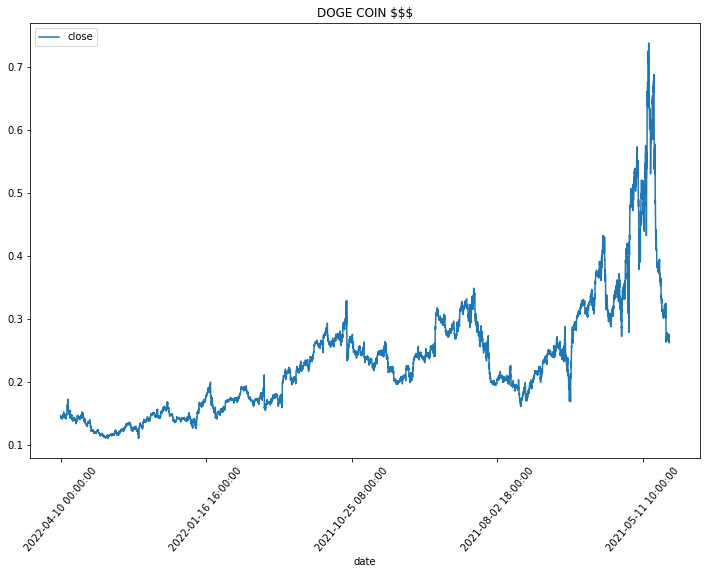

In [122]:
# Create Plot to Visualise close price
doge_price.plot(figsize=(12,8), x='date',rot=50,y='close',title='DOGE COIN $$$')

In [123]:
doge_price

,date,symbol,open,high,low,close,Volume DOGE,Volume USDT,tradecount
0,2022-04-10 00:00:00,DOGE/USDT,0.144200,0.150900,0.143500,0.146700,175105644.0,2.582461e+07,31010
1,2022-04-09 23:00:00,DOGE/USDT,0.143600,0.144600,0.143200,0.144200,25770210.0,3.709464e+06,4119
2,2022-04-09 22:00:00,DOGE/USDT,0.143500,0.143700,0.143400,0.143600,6618994.0,9.503413e+05,2260
3,2022-04-09 21:00:00,DOGE/USDT,0.142700,0.143900,0.142700,0.143400,6687150.0,9.574298e+05,2580
4,2022-04-09 20:00:00,DOGE/USDT,0.143000,0.143800,0.142600,0.142600,10412792.0,1.492045e+06,2098
...,...,...,...,...,...,...,...,...,...
8358,2021-04-26 12:00:00,DOGE/USDT,0.267200,0.280951,0.264581,0.275625,514894840.0,1.409606e+08,226752
8359,2021-04-26 11:00:00,DOGE/USDT,0.263059,0.269039,0.263030,0.267204,213311206.0,5.682986e+07,101144
8360,2021-04-26 10:00:00,DOGE/USDT,0.265075,0.265839,0.261615,0.263039,146000700.0,3.854048e+07,70284
8361,2021-04-26 09:00:00,DOGE/USDT,0.262339,0.265676,0.259100,0.265070,191009014.0,5.011752e+07,100252


In [124]:
doge_df = doge_price.drop(columns=['high','low','open','Volume USDT','tradecount','symbol'])

In [125]:
doge_df['date'] = pd.to_datetime(doge_price['date'])
doge_df['date_New'] = doge_df['date'].dt.date
doge_df = doge_df.drop(columns=['date'])
doge_df = doge_df.drop_duplicates(['date_New'], keep='last')
doge_df.index = doge_df['date_New']

In [126]:
doge_df = doge_df.drop('date_New', 1)

C:\Users\antho\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [127]:
doge_df

,close,Volume DOGE
date_New,,
2022-04-10,0.146700,175105644.0
2022-04-09,0.143200,38538844.0
2022-04-08,0.145700,71805326.0
2022-04-07,0.141100,203872360.0
2022-04-06,0.164200,783009068.0
...,...,...
2021-04-30,0.304282,118500613.0
2021-04-29,0.316292,325417388.0
2021-04-28,0.272436,91871315.0


In [128]:
# Use the `pct_change` function to calculate daily returns of Bitcoin
doge_df.close = doge_df.close.pct_change(periods = 1)

In [129]:
# Display sample data
doge_df

,close,Volume DOGE
date_New,,
2022-04-10,NaN,175105644.0
2022-04-09,-0.023858,38538844.0
2022-04-08,0.017458,71805326.0
2022-04-07,-0.031572,203872360.0
2022-04-06,0.163714,783009068.0
...,...,...
2021-04-30,-0.084048,118500613.0
2021-04-29,0.039470,325417388.0
2021-04-28,-0.138657,91871315.0


In [130]:
# Merge with Sentiment 
elon_combined_tweets_merge = doge_df.join(elon_combined_tweets_doge).dropna(how="any")
elon_combined_tweets_merge = elon_combined_tweets_merge.drop_duplicates()

# Display data
display(elon_combined_tweets_merge)

,close,Volume DOGE,username,name,tweet,text_compound,text_pos,text_neu,text_neg,text_sent
date_New,,,,,,,,,,
2021-04-28,-0.138657,91871315.0,elonmusk,Elon Musk,The Dogefather SNL May,0.0000,0.000,1.000,0.000,0.0
2021-05-10,0.232821,435315368.0,elonmusk,Elon Musk,SpaceX launching satellite Do moon next year ...,0.0000,0.000,1.000,0.000,0.0
2021-05-11,-0.083114,479943549.0,elonmusk,Elon Musk,Do want Tesla accept Doge,0.4404,0.565,0.435,0.000,1.0
2021-05-14,-0.125914,631050524.0,elonmusk,Elon Musk,Working Doge devs improve system transaction e...,0.7964,0.574,0.426,0.000,1.0
2021-05-16,0.026944,172663476.0,elonmusk,Elon Musk,PeterMcCormack Obnoxious threads like make wan...,-0.0516,0.322,0.424,0.254,-1.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-20,0.043506,14269365.0,elonmusk,Elon Musk,blueskykites Grimezsz WholeMarsBlog SpaceXMR m...,0.1531,0.100,0.821,0.079,1.0
2022-01-25,-0.030324,47201552.0,elonmusk,Elon Musk,I eat happy meal tv McDonalds accepts Dogecoin,0.7184,0.545,0.455,0.000,1.0
2022-01-27,0.017655,28057943.0,elonmusk,Elon Musk,dogeofficialceo EvaFoxU POTUS,0.0000,0.000,1.000,0.000,0.0


In [131]:
elon_combined_tweets_merge.corr().style.background_gradient()

,close,Volume DOGE,text_compound,text_pos,text_neu,text_neg,text_sent
close,1.000000,-0.473681,-0.036409,0.011077,-0.085635,0.163725,-0.072425
Volume DOGE,-0.473681,1.000000,0.178483,0.179362,-0.069657,-0.200856,0.221256
text_compound,-0.036409,0.178483,1.000000,0.729414,-0.426761,-0.505685,0.878787
text_pos,0.011077,0.179362,0.729414,1.000000,-0.887242,-0.038814,0.659835
text_neu,-0.085635,-0.069657,-0.426761,-0.887242,1.000000,-0.426518,-0.353873
text_neg,0.163725,-0.200856,-0.505685,-0.038814,-0.426518,1.000000,-0.526979
text_sent,-0.072425,0.221256,0.878787,0.659835,-0.353873,-0.526979,1.000000


In [132]:
""" SAVE AS CSV """
# elon_combined_tweets_merge.to_csv("Results\elon_musk_doge_sentiment_price_analysis.csv")

In [247]:
""" LINEAR REGRESSION WITH SCIKIT-LEARN """ 

import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(elon_combined_tweets_merge['text_compound']).reshape((-1,1))
y = np.array(elon_combined_tweets_merge['close'])
print(X)
print(y)

[[ 0.    ]
 [ 0.    ]
 [ 0.4404]
 [ 0.7964]
 [-0.0516]
 [ 0.5862]
 [ 0.1779]
 [ 0.296 ]
 [ 0.2732]
 [ 0.2263]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.4767]
 [ 0.7579]
 [ 0.    ]
 [ 0.8834]
 [-0.1779]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [-0.5574]
 [ 0.6908]
 [ 0.8934]
 [ 0.5994]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.1531]
 [-0.1531]
 [ 0.5719]
 [ 0.3626]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.6808]
 [ 0.4215]
 [ 0.    ]
 [ 0.    ]
 [ 0.2023]
 [ 0.7506]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.7269]
 [ 0.    ]
 [ 0.    ]
 [ 0.6369]
 [ 0.6369]
 [ 0.    ]
 [-0.0697]
 [-0.4721]
 [ 0.    ]
 [ 0.3182]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.6249]
 [ 0.    ]
 [ 0.    ]
 [-0.7227]
 [ 0.4133]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [-0.5106]
 [-0.886 ]
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]
 [ 0.1531]
 [ 0.7184]
 [ 0.    ]
 [ 0.6249]
 [ 0.    ]]
[-0.13865668  0.23282141 -0.08311396 -0.12591441  0.02694359  0.02694359
  0.02694359 -0.24785264 -0.24785264 -0.24785264 -0.24785264 -0.24785264
 -0.24

In [248]:
model = LinearRegression().fit(X, y)

In [249]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.0013255815250476921
intercept: -0.02348104267554149
slope: [-0.01021256]


C:\Users\antho\anaconda3\envs\mlenv\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Text(0.5, 0, 'Elonmusk Bitcoin Tweet Sentiment Data')

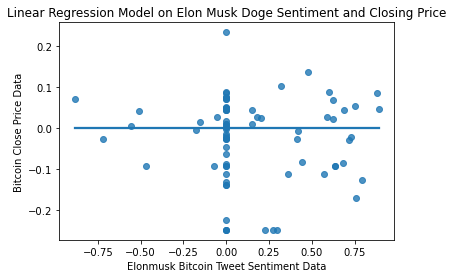

In [250]:
import seaborn as sns
plt.rcParams.update({'font.size': 10})

sns.regplot(x=X, y=y, data=r_sq, logistic=True, ci=None).set(title="Linear Regression Model on Elon Musk Doge Sentiment and Closing Price")
plt.ylabel('Bitcoin Close Price Data')
plt.xlabel('Elonmusk Bitcoin Tweet Sentiment Data')

In [251]:
# sns.regplot(x=X, y=y, data=r_sq, logistic=True, ci=None).set(title="Logistic Regression Model on Elon Musk Bitcoin Sentiment and Closing Price")
# plt.ylabel('Bitcoin Close Price Data')
# plt.xlabel('Elonmusk Bitcoin Tweet Sentiment Data')

In [252]:
new_model = LinearRegression().fit(X, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [-0.02348104]
slope: [[-0.01021256]]


In [253]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[-0.02348104 -0.02348104 -0.02797866 -0.03161433 -0.02295407 -0.02946765
 -0.02529786 -0.02650396 -0.02627111 -0.02579215 -0.02348104 -0.02348104
 -0.02348104 -0.02834937 -0.03122114 -0.02348104 -0.03250282 -0.02166423
 -0.02348104 -0.02348104 -0.02348104 -0.01778856 -0.03053588 -0.03260495
 -0.02960245 -0.02348104 -0.02348104 -0.02348104 -0.02504459 -0.0219175
 -0.02932161 -0.02718412 -0.02348104 -0.02348104 -0.02348104 -0.02348104
 -0.02348104 -0.03043376 -0.02778564 -0.02348104 -0.02348104 -0.02554704
 -0.03114659 -0.02348104 -0.02348104 -0.02348104 -0.03090455 -0.02348104
 -0.02348104 -0.02998542 -0.02998542 -0.02348104 -0.02276923 -0.01865969
 -0.02348104 -0.02673068 -0.02348104 -0.02348104 -0.02348104 -0.02986287
 -0.02348104 -0.02348104 -0.01610042 -0.02770189 -0.02348104 -0.02348104
 -0.02348104 -0.01826651 -0.01443271 -0.02348104 -0.02348104 -0.02348104
 -0.02504459 -0.03081775 -0.02348104 -0.02986287 -0.02348104]


In [254]:
LSTM_data = elon_combined_tweets_merge[['close','text_compound']].copy()
LSTM_data

,close,text_compound
date_New,,
2021-04-28,-0.138657,0.0000
2021-05-10,0.232821,0.0000
2021-05-11,-0.083114,0.4404
2021-05-14,-0.125914,0.7964
2021-05-16,0.026944,-0.0516
...,...,...
2022-01-20,0.043506,0.1531
2022-01-25,-0.030324,0.7184
2022-01-27,0.017655,0.0000


In [255]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(LSTM_data, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(LSTM_data) - window - 1):
        features = LSTM_data.iloc[i:(i + window), feature_col_number]
        target = LSTM_data.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [256]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 1
target_column = 1
X, y = window_data(LSTM_data, window_size, feature_column, target_column)

In [257]:
# Use 70% of the data for training and the remaineder for testing
# YOUR CODE HERE!

seventypercent = int(.7 * len(X))

X_train = X[: seventypercent - 1]
y_train = y[: seventypercent - 1]

X_test = X[seventypercent:]
y_test = y[seventypercent:]

In [258]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
# YOUR CODE HERE!

scaler = MinMaxScaler()
scaler.fit(X_train)
print(scaler.fit(X_train))

MinMaxScaler()


In [259]:
""" Transform the train and test data """


scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler.fit(y_train)

y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [260]:
# Reshape the features for the model
# YOUR CODE HERE!
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [261]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [262]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# YOUR CODE HERE!

model = Sequential()

number_units = 30
dropout_fraction = 0.2

# First Layer
model.add(LSTM(units=number_units,return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_fraction))

# Second Layer
model.add(LSTM(units=number_units, return_sequences=True,))
model.add(Dropout(dropout_fraction))

# Third Layer
model.add(LSTM(units=number_units, return_sequences=False,))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [263]:
# Compile the model
# YOUR CODE HERE!
model.compile(optimizer="adam", loss="mean_squared_error")

In [264]:
# Summarize the model
# YOUR CODE HERE!
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 30)            3840      
                                                                 
 dropout_12 (Dropout)        (None, 10, 30)            0         
                                                                 
 lstm_13 (LSTM)              (None, 10, 30)            7320      
                                                                 
 dropout_13 (Dropout)        (None, 10, 30)            0         
                                                                 
 lstm_14 (LSTM)              (None, 30)                7320      
                                                                 
 dropout_14 (Dropout)        (None, 30)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [265]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
# YOUR CODE HERE!

epochs = 10
batch_size = 30

model.fit(X_train, y_train, epochs=epochs, shuffle=False, batch_size=batch_size, verbose=1)

Epoch 1/10
2/2 [==============================] - 3s 7ms/step - loss: 0.2971
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 0.2513
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 0.2103
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 0.1551
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 0.1167
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0799
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0715
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0708
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0836
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.0831


In [266]:
# Evaluate the model
# YOUR CODE HERE!
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 720ms/step - loss: 0.0933


0.09327849745750427

In [267]:
# Make some predictions
# YOUR CODE HERE!
predicted = model.predict(X_test)

In [268]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [269]:
# Create a DataFrame of Real and Predicted values
results = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = LSTM_data.index[-len(real_prices): ]) 
results.head()

,Real,Predicted
date_New,,
2021-10-31,0.0000,0.334988
2021-11-01,0.0000,0.271826
2021-11-03,0.0000,0.276329
2021-11-05,0.6249,0.278793
2021-11-15,0.0000,0.222912


In [270]:
# Plot the real vs predicted values as a line chart
# YOUR CODE HERE!

import hvplot.pandas
results.hvplot.line(title = "Doge Price from Elon Musk Sentiment: Predicted vs Actual", xlabel="Date", ylabel="Price", height=400,width=800)

:NdOverlay   [Variable]
   :Curve   [date_New]   (value)